# Working on Real world problem using Sigmoid Neuron

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm_notebook # It gives us the progress bar while fitting the data

In [81]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w=None
        self.b=None
        
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-self.perceptron(x)))
    
    def grad_w(self,x,y):
        y_pred=self.sigmoid(x)
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred=self.sigmoid(x)
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epoch=1,lr=1,initialise=False,display_loss=False):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
            
        if display_loss:
            loss={}
            
        for i in tqdm_notebook(range(epoch),total = epoch,unit='Epoch'):
            dw=0
            db=0
            for x,y in zip(X,Y):
                db += self.grad_b(x,y)
                dw += self.grad_w(x,y)
                
            self.w -=dw*lr
            self.b -=db*lr
            
            if display_loss:
                y_pred=self.sigmoid(X)
                loss[i]=mse(y_pred,Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean')
            plt.show()
        
    def predict(self,X):
        y_pred=[]
        for x in X:
            y_pred.append(self.sigmoid(x))
        return np.array(y_pred)

In [82]:
sn=SigmoidNeuron()

## Load Data

In [4]:
!pip install wget

In [5]:
data=pd.read_csv("mobile_cleaned.csv")

In [6]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [7]:
data.shape

(341, 88)

In [8]:
X=data.drop('Rating',axis=1)

In [9]:
Y=data['Rating'].values

In [10]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [11]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(np.int)

In [12]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [13]:
Y_binarised=data['Class']

In [14]:
Y_binarised = Y_binarised.values

In [15]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Standardisation of data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
demo = np.random.random([100,1])

In [18]:
# demo

In [19]:
np.mean(demo)

0.5080686415956531

In [20]:
np.std(demo)

0.2789040637329771

In [21]:
demo.shape

(100, 1)

In [22]:
type(demo)

numpy.ndarray

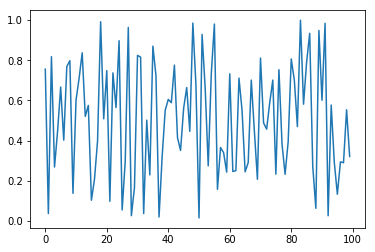

In [23]:
plt.plot(demo)
plt.show()

In [24]:
scaler=StandardScaler()

In [25]:
scaler.fit(demo) # here fit function Compute the mean and std to be used for later scaling.Need 2d array

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaler.mean_

array([0.50806864])

In [27]:
scaler.scale_  # In class of StandardScaler() scale_ function compute standard deviation.

array([0.27890406])

In [28]:
demoT=scaler.transform(demo)

In [29]:
demoT.mean()

3.3195668436292183e-16

In [30]:
demoT.std()

0.9999999999999998

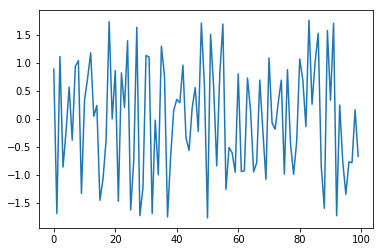

In [31]:
plt.plot(demoT)
plt.show()

## Splitting data into train test split

In [32]:
from sklearn.model_selection import train_test_split as tts

In [33]:
X_train,X_test,Y_train,Y_test=tts(X,Y,random_state=0,stratify=Y_binarised) # tts default splits into 75,25 ratio
# Stratify ensures that the number of 0 and 1 in train and test data is roughly same

Stratify ensures that the train and test split data follows the output distribution of the full dataset. That is, if there are 25% of zeros and 75% of ones, stratify=Y_binarized will make sure that your random split also has 25% of 0's and 75% of 1's.

In [34]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [35]:
scaler=StandardScaler()

In [36]:
X_scaler_train=scaler.fit_transform(X_train)
X_scaler_test=scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Warnings are bieng given for all internal conversion but its all good

In [37]:
X_scaler_train.shape

(255, 87)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
minmaxscaler=MinMaxScaler() #It finds out minimum and max of data and then standardise them between 0 and 1.

In [40]:
Y_scaled_train=minmaxscaler.fit_transform(Y_train.reshape(-1,1)) # We are reshaping it as this function takes 2d array
# we can do reshape either in (-1,1) or (1,-1)

In [41]:
Y_scaled_test=minmaxscaler.transform(Y_test.reshape(-1,1))

In [42]:
Y_scaled_train.min()

0.0

In [43]:
scaled_threshold=minmaxscaler.transform(np.array([threshold]).reshape(1,-1))

In [44]:
scaled_threshold = list(scaled_threshold)[0][0]

In [45]:
scaled_threshold

0.6800000000000002

In [46]:
Y_binarised_train=(Y_scaled_train > scaled_threshold).astype(np.int).ravel() # Ravel flattens data

In [47]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [48]:
Y_binarised_test=(Y_scaled_test > scaled_threshold).astype(np.int) # Ravel flattens data

In [49]:
Y_binarised_test

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [50]:
Y_binarised_test= Y_binarised_test.ravel() # Ravel flattens data

In [51]:
Y_binarised_test.shape

(86,)

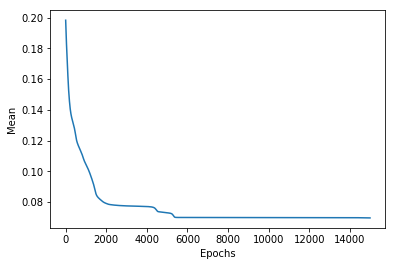

In [106]:
sn.fit(X_scaler_train,Y_scaled_train,15000,0.001,True,display_loss=True)

In [99]:
Y_pred_train=sn.predict(X_scaler_train)

In [100]:
Y_pred_test=sn.predict(X_scaler_test)

In [101]:
Y_pred_train_binarised=(Y_pred_train > scaled_threshold).astype(np.int).ravel() # Ravel flattens data

In [102]:
Y_pred_test_binarised=(Y_pred_test > scaled_threshold).astype(np.int).ravel() # Ravel flattens data

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
Y_pred_train_binarised.shape

(255,)

In [105]:
train_accuracy=accuracy_score(Y_pred_train_binarised,Y_binarised_train)
test_accuracy=accuracy_score(Y_pred_test_binarised,Y_binarised_test)

In [97]:
print(train_accuracy,test_accuracy)

0.7725490196078432 0.7790697674418605
